In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds


In [2]:
#importation des données
dtype_dict = {
    'col5':str,
    'col8':str,
    'col11':str,
    'col15':str
}
train=pd.read_csv("C:/Users/eva/Documents/mémoire/train_ver2.csv", dtype=dtype_dict,nrows=10000, low_memory=False)


In [3]:
dtype_dict = {
    'col15': str
}
test=pd.read_csv("C:/Users/eva/Documents/mémoire/test_ver2.csv", dtype=dtype_dict,nrows=10000, low_memory=False)

In [4]:
print(train.head()) 
print(train.info())

   fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  \
0  2015-01-28   1375586            N              ES    H   35  2015-01-12   
1  2015-01-28   1050611            N              ES    V   23  2012-08-10   
2  2015-01-28   1050612            N              ES    V   23  2012-08-10   
3  2015-01-28   1050613            N              ES    H   22  2012-08-10   
4  2015-01-28   1050614            N              ES    V   23  2012-08-10   

   ind_nuevo antiguedad  indrel  ... ind_hip_fin_ult1  ind_plan_fin_ult1  \
0        0.0          6     1.0  ...                0                  0   
1        0.0         35     1.0  ...                0                  0   
2        0.0         35     1.0  ...                0                  0   
3        0.0         35     1.0  ...                0                  0   
4        0.0         35     1.0  ...                0                  0   

  ind_pres_fin_ult1 ind_reca_fin_ult1 ind_tjcr_fin_ult1  ind_valo_fin_ult1

In [5]:
print(train.isnull().sum())

fecha_dato                   0
ncodpers                     0
ind_empleado                50
pais_residencia             50
sexo                        50
age                          0
fecha_alta                  50
ind_nuevo                   50
antiguedad                   0
indrel                      50
ult_fec_cli_1t            9988
indrel_1mes                 50
tiprel_1mes                 50
indresi                     50
indext                      50
conyuemp                 10000
canal_entrada               50
indfall                     50
tipodom                     50
cod_prov                    54
nomprov                     54
ind_actividad_cliente       50
renta                     1899
segmento                    50
ind_ahor_fin_ult1            0
ind_aval_fin_ult1            0
ind_cco_fin_ult1             0
ind_cder_fin_ult1            0
ind_cno_fin_ult1             0
ind_ctju_fin_ult1            0
ind_ctma_fin_ult1            0
ind_ctop_fin_ult1            0
ind_ctpp

In [6]:
train.describe()
train.isnull().mean() * 100

fecha_dato                 0.00
ncodpers                   0.00
ind_empleado               0.50
pais_residencia            0.50
sexo                       0.50
age                        0.00
fecha_alta                 0.50
ind_nuevo                  0.50
antiguedad                 0.00
indrel                     0.50
ult_fec_cli_1t            99.88
indrel_1mes                0.50
tiprel_1mes                0.50
indresi                    0.50
indext                     0.50
conyuemp                 100.00
canal_entrada              0.50
indfall                    0.50
tipodom                    0.50
cod_prov                   0.54
nomprov                    0.54
ind_actividad_cliente      0.50
renta                     18.99
segmento                   0.50
ind_ahor_fin_ult1          0.00
ind_aval_fin_ult1          0.00
ind_cco_fin_ult1           0.00
ind_cder_fin_ult1          0.00
ind_cno_fin_ult1           0.00
ind_ctju_fin_ult1          0.00
ind_ctma_fin_ult1          0.00
ind_ctop

In [7]:
print(train.describe())

           ncodpers    ind_nuevo       indrel  indrel_1mes  conyuemp  tipodom  \
count  1.000000e+04  9950.000000  9950.000000       9950.0       0.0   9950.0   
mean   1.049352e+06     0.000402     1.118191          1.0       NaN      1.0   
std    5.917693e+03     0.020047     3.401457          0.0       NaN      0.0   
min    1.042162e+06     0.000000     1.000000          1.0       NaN      1.0   
25%    1.045408e+06     0.000000     1.000000          1.0       NaN      1.0   
50%    1.048608e+06     0.000000     1.000000          1.0       NaN      1.0   
75%    1.052755e+06     0.000000     1.000000          1.0       NaN      1.0   
max    1.375586e+06     1.000000    99.000000          1.0       NaN      1.0   

          cod_prov  ind_actividad_cliente         renta  ind_ahor_fin_ult1  \
count  9946.000000            9950.000000  8.101000e+03            10000.0   
mean     24.485622               0.420000  1.098319e+05                0.0   
std      14.730467               0.4

In [8]:
train.drop(columns=['ult_fec_cli_1t','conyuemp'], inplace=True)
test.drop(columns=['ult_fec_cli_1t','conyuemp'], inplace=True)


In [9]:
#renommer les colonnes
col_names = {"ncodpers":"cust_id", "ind_empleado":"emp_index","pais_residencia":"residence",
            "sexo":"sex","fecha_alta":"first_date","ind_nuevo":"new_cust","antiguedad":"seniority",
            "indrel":"is_primary","indrel_1mes":"cust_type",
            "tiprel_1mes":"cust_rel_type","indresi":"residence_index","indext":"foreigner_index",
            "canal_entrada":"channel","cod_prov":"province","nomprov":"province_name",
            "ind_actividad_cliente":"active_index","renta":"income","segmento":"segment"}

train.rename(col_names, axis = 1, inplace = True)
test.rename(col_names, axis = 1, inplace = True)


In [10]:
#conversion des données
train.age = pd.to_numeric(train.age, errors='coerce')
train.income = pd.to_numeric(train.income, errors='coerce')
train.seniority = pd.to_numeric(train.seniority, errors='coerce')
train.first_date = pd.to_datetime(train.first_date, errors = 'coerce')
train['fecha_dato'] = pd.to_datetime(train['fecha_dato'])

test.age = pd.to_numeric(test.age, errors='coerce')
test.income = pd.to_numeric(test.income, errors='coerce')
test.seniority = pd.to_numeric(test.seniority, errors='coerce')
test.first_date = pd.to_datetime(test.first_date, errors = 'coerce')
test['fecha_dato'] = pd.to_datetime(test['fecha_dato'])

In [11]:
#imputation des valeurs manquantes
cols = ['emp_index','residence','sex','first_date','new_cust','is_primary',"cust_type","cust_rel_type",
       "province","province_name","active_index","channel","segment"]

for i in cols:
    train.loc[train[i].isnull(), i] = train[i].value_counts().index[0]
    test.loc[test[i].isnull(), i] = test[i].value_counts().index[0]
train['income'].fillna(train['income'].mean(), inplace = True)
test['income'].fillna(test['income'].mean(), inplace = True)

In [12]:
train.head()

,fecha_dato,cust_id,emp_index,residence,sex,age,first_date,new_cust,seniority,is_primary,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35.0,2015-01-12,0.0,6.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23.0,2012-08-10,0.0,35.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23.0,2012-08-10,0.0,35.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22.0,2012-08-10,0.0,35.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23.0,2012-08-10,0.0,35.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [13]:
age_group = [0, 20, 45, 65, 100]
age_labels = ['young', 'adult', 'senior', 'elder']

train['age_grouped'] = pd.cut(train.age, bins = age_group, labels = age_labels)
test['agg_grouped'] = pd.cut(test.age, bins = age_group, labels = age_labels)

In [14]:
train_income_group = [0, np.nanpercentile(train['income'], 25), np.nanpercentile(train['income'], 50), np.nanpercentile(train['income'], 75), np.nanpercentile(train['income'], 100)]
test_income_group = [0, np.nanpercentile(test['income'], 25), np.nanpercentile(test['income'], 50), np.nanpercentile(test['income'], 75), np.nanpercentile(test['income'], 100)]
income_labels = ['Low','Ordinary','Median-high','High']

train['income_grouped'] = pd.cut(train['income'], train_income_group, labels = income_labels)
test['income_grouped'] = pd.cut(test['income'], test_income_group, labels = income_labels)

In [15]:
#recommandation basé sur la popularité des produits
popular_df = pd.DataFrame(columns=['product', 'sales_volume', 'sales_frequency'])
df_numeric_cols = train.select_dtypes(include=[np.number])  
colonnes = df_numeric_cols.iloc[:, 10:34]  
for col in colonnes.columns:
    second_most_frequent_value = train[col].value_counts().iloc[1] if len(train[col].value_counts()) > 1 else None
    sales_volume = second_most_frequent_value if second_most_frequent_value is not None else 0
    sales_frequency = round(sales_volume / train.shape[0], 2) if sales_volume > 0 else 0
    new_row = pd.DataFrame([[col, sales_volume, sales_frequency]], columns=['product', 'sales_volume', 'sales_frequency'])
    popular_df = pd.concat([popular_df, new_row], ignore_index=True)

popular_df.sort_values('sales_frequency', inplace=True, ascending=False)
popular_df.reset_index(inplace=True)

In [16]:
popular_df[['product','sales_frequency']]

,product,sales_frequency
0,ind_recibo_ult1,0.08
1,ind_cco_fin_ult1,0.07
2,ind_ecue_fin_ult1,0.06
3,ind_cno_fin_ult1,0.04
4,ind_nom_pens_ult1,0.02
5,ind_nomina_ult1,0.02
6,ind_ctju_fin_ult1,0.01
7,ind_tjcr_fin_ult1,0.01
8,ind_dela_fin_ult1,0.01
9,ind_reca_fin_ult1,0.01


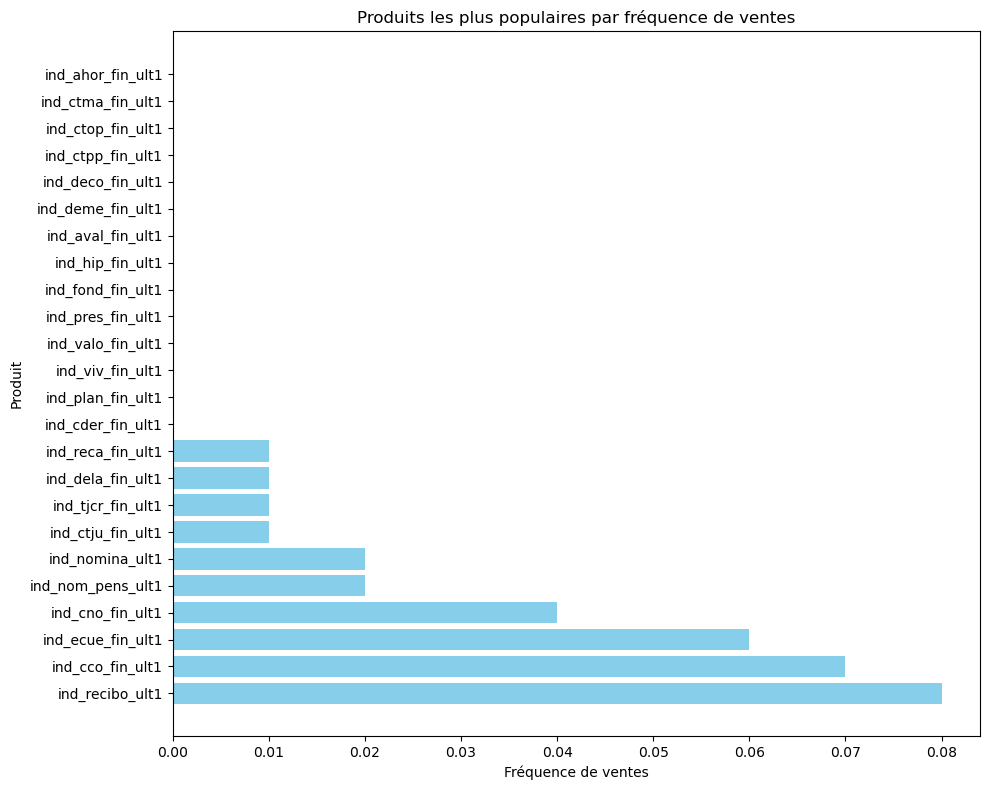

In [17]:
plt.figure(figsize=(10, 8))
plt.barh(popular_df['product'], popular_df['sales_frequency'], color='skyblue')
plt.xlabel('Fréquence de ventes')
plt.ylabel('Produit')
plt.title('Produits les plus populaires par fréquence de ventes')
plt.tight_layout()
plt.show()

In [18]:
df_cf = train.iloc[:,[0,1,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]]
df_cf = df_cf.groupby("cust_id").sum()
df_cf = df_cf.fillna(0)
df_cf.index = df_cf.index.astype('string')
df_cf_user = df_cf.copy()
df_cf_user = pd.DataFrame(cosine_similarity(df_cf_user), index = df_cf_user.index.astype('string'), columns = df_cf_user.index.astype('string'))


C:\Users\eva\AppData\Local\Temp\ipykernel_10104\212063770.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cf = df_cf.groupby("cust_id").sum()


In [19]:
df_cf_item = df_cf.copy()
df_cf_item = df_cf_item[:10000].T
df_cf_item = pd.DataFrame(cosine_similarity(df_cf_item), index = df_cf_item.index.astype('string'), columns = df_cf_item.index.astype('string'))
df_cf_item.shape

(24, 24)

In [20]:
#filtrage collaboratif basé sur un modèle utilisent des algorithmes d’apprentissage automatique
def matrix_factorization_svd(user_item_matrix, num_factors = 10, num_iterations = 100, learning_rate = 0.01, regularization_rate = 0.01):
    
    num_users, num_items = user_item_matrix.shape
    
    # Initialize user and item matrices
    user_matrix = np.random.rand(num_users, num_factors)
    item_matrix = np.random.rand(num_items, num_factors)
    matrix = user_item_matrix.values
    # Perform Gradient Descent updates
    for iteration in range(num_iterations):
        for i in range(num_users):
            for j in range(num_items):
                if matrix[i, j] > 0:
                    
                    error = matrix[i, j] - np.dot(user_matrix[i, :], item_matrix[j, :])
                    user_gradient = learning_rate * (2 * error * item_matrix[j, :] - regularization_rate * user_matrix[i, :])
                    item_gradient = learning_rate * (2 * error * user_matrix[i, :] - regularization_rate * item_matrix[j, :])
                    user_matrix[i, :] += user_gradient
                    item_matrix[j, :] += item_gradient
            return user_matrix, item_matrix


In [21]:
# Perform the matrix factorization
user_item_matrix = df_cf.iloc[0:10000,:]
user_factors, item_factors = matrix_factorization_svd(user_item_matrix, num_factors = 10, num_iterations = 100, learning_rate = 0.01, regularization_rate = 0.01)

# Add the customer id and product id back to the factorization matrices for recommendation
user_factors = pd.DataFrame(user_factors, index = user_item_matrix.index)
item_factors = pd.DataFrame(item_factors, index = user_item_matrix.columns)
def FM_recommender(cust_id, top_n):
    
    cust_id = str(cust_id)  
    user_scores = np.dot(user_factors.loc[cust_id], item_factors.T)
    user_scores = pd.Series(user_scores, index = user_item_matrix.columns)  
    recommend_list = user_scores.sort_values(ascending = False)[0:top_n]  
    
    return recommend_list  

In [22]:
FM_recommender(cust_id =1065733, top_n = 10)


ind_reca_fin_ult1    4.209900
ind_hip_fin_ult1     4.176944
ind_fond_fin_ult1    3.716620
ind_valo_fin_ult1    3.706515
ind_ecue_fin_ult1    3.496465
ind_ctma_fin_ult1    3.248178
ind_cder_fin_ult1    3.186342
ind_nom_pens_ult1    3.180400
ind_recibo_ult1      3.153670
ind_plan_fin_ult1    3.152412
dtype: float64

In [23]:
FM_recommender(cust_id =1375586, top_n = 10)


ind_hip_fin_ult1     3.456601
ind_valo_fin_ult1    3.345543
ind_fond_fin_ult1    3.297293
ind_reca_fin_ult1    3.024418
ind_dela_fin_ult1    2.818931
ind_ctpp_fin_ult1    2.805737
ind_cder_fin_ult1    2.737771
ind_aval_fin_ult1    2.641068
ind_deme_fin_ult1    2.629720
ind_ecue_fin_ult1    2.626773
dtype: float64

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder


# Liste des noms des colonnes de produits
product_cols = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
               'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
               'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
               'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
               'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

# Sélection des variables explicatives
feature_list = ['cust_id', 'sex', 'segment', 'age_grouped', 'income_grouped', 'seniority']
col_list = feature_list + product_cols
train = train[col_list]

# Conversion des variables catégorielles en entiers
train['sex'] = pd.Categorical(train['sex']).codes
train['segment'] = pd.Categorical(train['segment']).codes

# Diviser les données en ensembles d'entraînement et de test
train_data, test_data = train_test_split(train, test_size=0.2, random_state=42)

# Nombre de clients et de produits
n_clients = len(train['cust_id'].unique())
n_products = len(product_cols)

# Création du modèle de recommandation
client_input = Input(shape=(1,))
client_embedding = Embedding(n_clients, 50)(client_input)
client_flat = Flatten()(client_embedding)

# Shuffler les colonnes de produits pour éviter les biais
import random
random.shuffle(product_cols)

product_inputs = []
product_embeddings = []

for col in product_cols:
    input_layer = Input(shape=(1,))
    embedding_layer = Embedding(input_dim=2, output_dim=5)(input_layer)  # Supposons 2 catégories par colonne de produit
    flattened_layer = Flatten()(embedding_layer)
    product_inputs.append(input_layer)
    product_embeddings.append(flattened_layer)

product_concat = Concatenate()(product_embeddings)

concat = Concatenate()([client_flat, product_concat])
dense1 = Dense(128, activation='relu')(concat)
dense2 = Dense(64, activation='relu')(dense1)
output = Dense(len(train['segment'].unique()), activation='softmax')(dense2)

model = Model(inputs=[client_input] + product_inputs, outputs=output)

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
X_train = [train_data['cust_id'].values] + [train_data[col].values for col in product_cols]
y_train = to_categorical(train_data['segment'])
model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1)

# Évaluation du modèle sur l'ensemble d'entraînement
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Train Accuracy: {accuracy}")
print(f"Train loss: {loss}")



Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7928 - loss: 0.7040
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8596 - loss: 0.3810
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8816 - loss: 0.3484
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8898 - loss: 0.3402
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8905 - loss: 0.3317
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8861 - loss: 0.3385
Train Accuracy: 0.8886250257492065
Train loss: 0.33100998401641846


In [25]:
# Préparation des données de test
X_test = [test_data['cust_id'].values] + [test_data[col].values for col in product_cols]
y_test = to_categorical(test_data['segment'])

# Prédiction sur les données de test
predictions = model.predict(X_test)

# Convertir les prédictions en classes
predicted_classes = np.argmax(predictions, axis=1)

# Convertir les étiquettes de test en classes
true_classes = np.argmax(y_test, axis=1)

# Calculer les métriques de classification
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
# Imprimer les résultats des métriques
print("Résultats des métriques de classification :")
print(f"  Accuracy: {accuracy}")
print(f"  Precision: {precision}")
print(f"  Recall: {recall}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step
Résultats des métriques de classification :
  Accuracy: 0.883
  Precision: 0.8701372020166394
  Recall: 0.883


In [26]:
# # Préparation des données de test
# X_test = [test_data['cust_id'].values] + [test_data[col].values for col in product_cols]
# y_test = to_categorical(test_data['segment'])

# # Prédiction sur les données de test
# predictions = model.predict(X_test)

# # Évaluation des performances
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f"Test Accuracy: {test_accuracy}")
# print(f"Test Loss: {test_loss}")

# # Autres mesures de performance
# # Vous pouvez également calculer d'autres métriques comme la précision, le rappel, le score F1, etc.
# # Par exemple, pour calculer la précision :
# precision = precision_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), average='weighted')
# print(f"Precision: {precision}")

# # De même, vous pouvez calculer d'autres métriques comme le rappel, le score F1, etc.


In [27]:
# Préparation des données de test
X_test = [test_data['cust_id'].values] + [test_data[col].values for col in product_cols]
y_test = to_categorical(test_data['segment'])

# Obtenir les noms des produits
product_names = product_cols

# Obtenir les prédictions du modèle pour les données de test
predictions = model.predict(X_test)

# Afficher les scores prédits pour chaque produit et les produits recommandés
for i in range(len(predictions)):
    print(f"Client {i+1}:")
    client_predictions = predictions[i]
    for j, score in enumerate(client_predictions):
        print(f"  Product: {product_names[j]}, Score: {score}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Client 1:
  Product: ind_pres_fin_ult1, Score: 0.000827741576358676
  Product: ind_nomina_ult1, Score: 0.0831344872713089
  Product: ind_cco_fin_ult1, Score: 0.9160377979278564
Client 2:
  Product: ind_pres_fin_ult1, Score: 0.000827741576358676
  Product: ind_nomina_ult1, Score: 0.0831344872713089
  Product: ind_cco_fin_ult1, Score: 0.9160377979278564
Client 3:
  Product: ind_pres_fin_ult1, Score: 0.000827741576358676
  Product: ind_nomina_ult1, Score: 0.0831344872713089
  Product: ind_cco_fin_ult1, Score: 0.9160377979278564
Client 4:
  Product: ind_pres_fin_ult1, Score: 0.0022549955174326897
  Product: ind_nomina_ult1, Score: 0.2946580648422241
  Product: ind_cco_fin_ult1, Score: 0.7030869126319885
Client 5:
  Product: ind_pres_fin_ult1, Score: 0.000827741576358676
  Product: ind_nomina_ult1, Score: 0.0831344872713089
  Product: ind_cco_fin_ult1, Score: 0.9160377979278564
Client 6:
  Product: ind_pres_fin_ult1, Score: 0.07474710792303085
  Produc

In [28]:
# # Préparation des données de test
# X_test = [test_data['cust_id'].values] + [test_data[col].values for col in product_cols]
# y_test = to_categorical(test_data['segment'])

# # Obtenir les noms des produits
# product_names = product_cols

# # Obtenir les prédictions du modèle pour les données de test
# predictions = model.predict(X_test)

# # Afficher les scores prédits pour chaque produit et les produits recommandés
# for i in range(len(predictions)):
#     print(f"Client {i+1}:")
#     client_predictions = predictions[i]
#     sorted_indices = np.argsort(client_predictions)  # Tri croissant des indices
#     recommended_products = [product_names[idx] for idx in sorted_indices]  # Sélection de tous les produits recommandés
#     print("Produits recommandés : ", recommended_products)
#     for j, score in enumerate(client_predictions):
#         print(f"  Product: {product_names[j]}, Score: {score}")
#     print()


In [29]:
import random

# Noms reformulés des produits
product_names_reformulated = {
    'ind_ahor_fin_ult1': 'Compte épargne', 
    'ind_aval_fin_ult1': 'Garanties', 
    'ind_cco_fin_ult1': 'Compte courant', 
    'ind_cder_fin_ult1': 'Compte dérivé', 
    'ind_cno_fin_ult1': 'Compte paie', 
    'ind_ctju_fin_ult1': 'Compte junior',
    'ind_ctma_fin_ult1': 'Compte plus particulier', 
    'ind_ctop_fin_ult1': 'Compte particulier', 
    'ind_ctpp_fin_ult1': 'Compte plus part.', 
    'ind_deco_fin_ult1': 'Dépôt court terme',
    'ind_deme_fin_ult1': 'Dépôts moyen terme', 
    'ind_dela_fin_ult1': 'Dépôts long terme', 
    'ind_ecue_fin_ult1': 'Compte électronique', 
    'ind_fond_fin_ult1': 'Fonds', 
    'ind_hip_fin_ult1': 'Hypothèque',
    'ind_plan_fin_ult1': 'Retraite', 
    'ind_pres_fin_ult1': 'Prêts', 
    'ind_reca_fin_ult1': 'Impôts', 
    'ind_tjcr_fin_ult1': 'Carte crédit', 
    'ind_valo_fin_ult1': 'Titres', 
    'ind_viv_fin_ult1': 'Compte accueil', 
    'ind_nomina_ult1': 'Paie',
    'ind_nom_pens_ult1': 'Retraites',  
    'ind_recibo_ult1': 'Prélèvement automatique'
}

# Obtenir les prédictions du modèle pour les données de test
predictions = model.predict(X_test)

# Sélectionner 10 clients au hasard
random_clients = random.sample(range(len(predictions)), 15)

# Afficher les scores prédits pour chaque produit et les produits recommandés pour les 10 clients sélectionnés
for i in random_clients:
    print(f"Client {i+1}:")
    client_predictions = predictions[i]
    sorted_indices = np.argsort(client_predictions)# Tri décroissant des indices
    recommended_products = [product_names_reformulated[product_cols[idx]] for idx in sorted_indices]  # Sélection de tous les produits recommandés
    print("Produits recommandés : ", recommended_products)
    for j, score in enumerate(client_predictions):
        product_name = product_names_reformulated[product_cols[j]]
        print(f"  Product: {product_name}, Score: {score}")
    print()


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Client 41:
Produits recommandés :  ['Prêts', 'Paie', 'Compte courant']
  Product: Prêts, Score: 0.000827741576358676
  Product: Paie, Score: 0.0831344872713089
  Product: Compte courant, Score: 0.9160377979278564

Client 58:
Produits recommandés :  ['Prêts', 'Paie', 'Compte courant']
  Product: Prêts, Score: 0.000827741576358676
  Product: Paie, Score: 0.0831344872713089
  Product: Compte courant, Score: 0.9160377979278564

Client 486:
Produits recommandés :  ['Prêts', 'Paie', 'Compte courant']
  Product: Prêts, Score: 0.000827741576358676
  Product: Paie, Score: 0.0831344872713089
  Product: Compte courant, Score: 0.9160377979278564

Client 216:
Produits recommandés :  ['Prêts', 'Paie', 'Compte courant']
  Product: Prêts, Score: 0.000827741576358676
  Product: Paie, Score: 0.0831344872713089
  Product: Compte courant, Score: 0.9160377979278564

Client 1603:
Produits recommandés :  ['Prêts', 'Paie', 'Compte courant']
  Product: Prêts, Score: 0.000